In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
#防止乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
path='D:/Python/exercise/household_power_consumption.txt'
df1=pd.read_csv(path, sep=';',low_memory=False)
df = df1.sample(1000)
print(df.head())

              Date      Time Global_active_power Global_reactive_power  \
1438734  10/9/2009  20:18:00               1.040                 0.062   
414171   30/9/2007  08:15:00               0.352                 0.130   
991209   4/11/2008  01:33:00               0.432                 0.204   
1227797  17/4/2009  08:41:00               1.484                 0.084   
818173    6/7/2008  21:37:00               0.686                 0.236   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1438734  240.090            4.200          0.000          0.000   
414171   240.310            1.400          0.000          0.000   
991209   240.260            2.000          0.000          1.000   
1227797  239.370            6.200          0.000          1.000   
818173   243.140            3.000          0.000          1.000   

         Sub_metering_3  
1438734             0.0  
414171              0.0  
991209              0.0  
1227797            18.0  
818173              1.

#清洗数据#

In [5]:
df.replace('?',np.nan,inplace=True)
df=df.dropna(axis=0,how='any')

In [6]:
#创建时间格式#
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

#获取相应的x, y#

电流预测R2:  0.998351918075258
电流参数: [4.34893936 0.09807573]
模型的截距:4.570849179806062


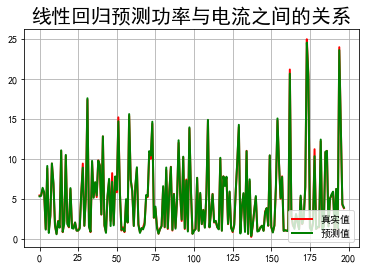

In [7]:
## 功率和电流之间的关系
X = df.iloc[:,2:4].astype(np.float32)
Y = df.iloc[:,5].astype(np.float32)

## 数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

##标准化
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

## 结果预测
Y_predict = lr.predict(X_test)

## 模型评估
print("电流预测R2: ", lr.score(X_test,Y_test))
print("电流参数:", lr.coef_)
print("模型的截距:", end='')
print(lr.intercept_)

## 绘制图表
#### 电流关系
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, Y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

In [8]:
#save result#
from sklearn.externals import joblib
joblib.dump(ss, 'D:/Python/exercise/model/ss.m')
joblib.dump(lr, 'D:/Python/exercise/model/lr.m')

['D:/Python/exercise/model/lr.m']